#IMPORT NECESSARY LIBRARIES

In [1]:
import os
import random
random.seed = 42
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import seaborn as sns

In [2]:
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import VGG19, ResNet50V2, InceptionV3, Xception
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam

##Define runtime

In [5]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.1 MB/s eta 0:00:00
time: 610 µs (started: 2024-07-16 13:35:01 +00:00)


#DATA PREPARATION

##Load Dataset

In [6]:
!gdown "1fHPO2Q9PyMHjDcyeAhjuuv8IjJ9OWoVd"

Downloading...
From (original): https://drive.google.com/uc?id=1fHPO2Q9PyMHjDcyeAhjuuv8IjJ9OWoVd
From (redirected): https://drive.google.com/uc?id=1fHPO2Q9PyMHjDcyeAhjuuv8IjJ9OWoVd&confirm=t&uuid=d1e4ea31-dd92-494d-946a-dddc81950dc9
To: /content/HAM10000.zip
100% 5.58G/5.58G [01:26<00:00, 64.2MB/s]
time: 1min 32s (started: 2024-07-16 13:35:01 +00:00)


In [7]:
!unzip HAM10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: ham10000_images_part_2/ISIC_0029342.jpg  
  inflating: h

##Import data

###hmnist Dataset

In [8]:
hmnist_28_L=pd.read_csv('/content/hmnist_28_28_L.csv')
hmnist_28_L

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0


time: 1.68 s (started: 2024-07-16 13:38:01 +00:00)


In [9]:
hmnist_28_RGB=pd.read_csv('/content/hmnist_28_28_RGB.csv')
hmnist_28_RGB

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


time: 6.12 s (started: 2024-07-16 13:38:08 +00:00)


###Meta-data

In [11]:
meta_data=pd.read_csv('/content/HAM10000_metadata.csv')
meta_data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


time: 112 ms (started: 2024-07-16 13:39:05 +00:00)


In [12]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
time: 37.9 ms (started: 2024-07-16 13:39:15 +00:00)


In [13]:
# Check for unique entries in each column
unique_counts = meta_data.nunique()

print("\nUnique entries in each column:")
print(unique_counts)


Unique entries in each column:
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64
time: 28.2 ms (started: 2024-07-16 13:39:53 +00:00)


In [14]:
meta_data['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

time: 10.8 ms (started: 2024-07-16 13:40:11 +00:00)


In [15]:
meta_data['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

time: 4.92 ms (started: 2024-07-16 13:40:18 +00:00)


##Data Analysis

In [16]:
meta_data.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


time: 54.4 ms (started: 2024-07-16 13:40:56 +00:00)


In [17]:
print(meta_data.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64
time: 14.3 ms (started: 2024-07-16 13:41:10 +00:00)


###Plot data

####Plot missing values

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


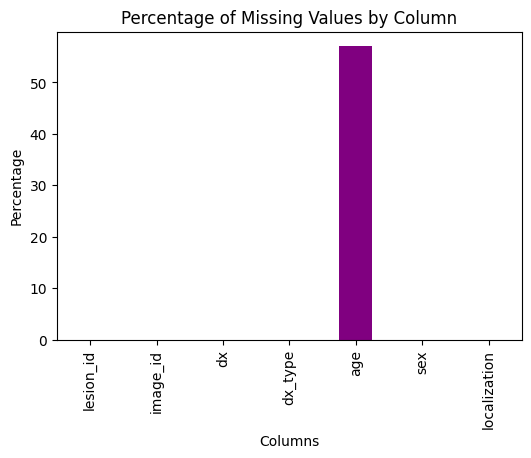

time: 265 ms (started: 2024-07-16 13:47:35 +00:00)


In [18]:
# Plot of Missing Values
missing_values = meta_data.isnull().sum()
print(missing_values)
missing_values_percentage = (missing_values)
plt.figure(figsize=(6, 4))
missing_values_percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

In [23]:
# Define categorical and numerical columns
categorical_columns = ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization']
numerical_columns = ['age']

time: 728 µs (started: 2024-07-16 13:48:35 +00:00)


In [20]:
# Distribution of value count for Location of disease
for column in categorical_columns:
    meta_data['localization'].value_counts()

meta_data['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

time: 20.9 ms (started: 2024-07-16 13:47:55 +00:00)


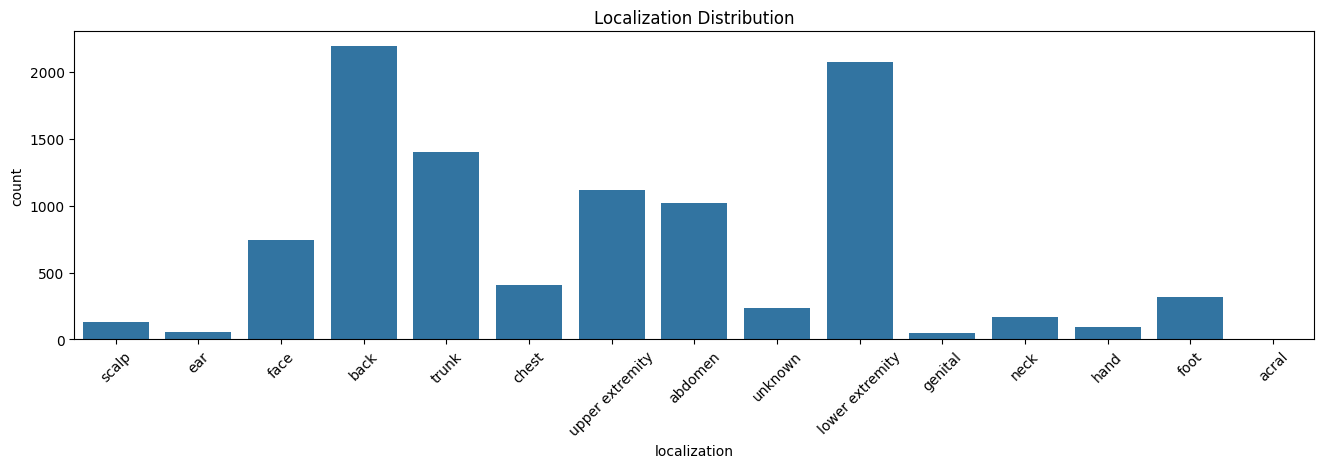

time: 445 ms (started: 2024-07-16 13:48:06 +00:00)


In [21]:
plt.figure(figsize=(16, 4))
sns.countplot(data=meta_data, x='localization')
plt.title('Localization Distribution')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Distribution of value count for Sex in the dataset
for column in categorical_columns:
    meta_data['sex'].value_counts()

meta_data['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

time: 29.7 ms (started: 2024-07-16 13:48:20 +00:00)


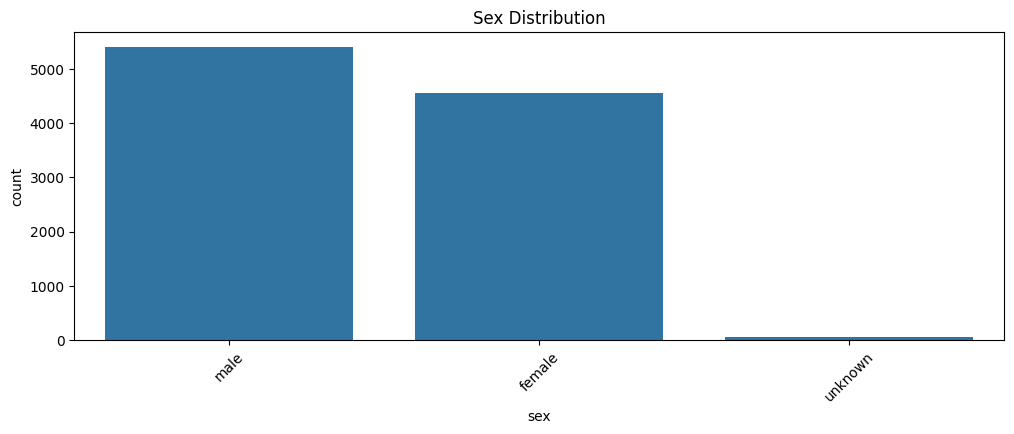

time: 254 ms (started: 2024-07-16 13:48:46 +00:00)


In [24]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='sex')
plt.title('Sex Distribution')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Distribution of value count for Type of disease
for column in categorical_columns:
    meta_data['dx'].value_counts()

meta_data['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

time: 31.3 ms (started: 2024-07-16 13:48:58 +00:00)


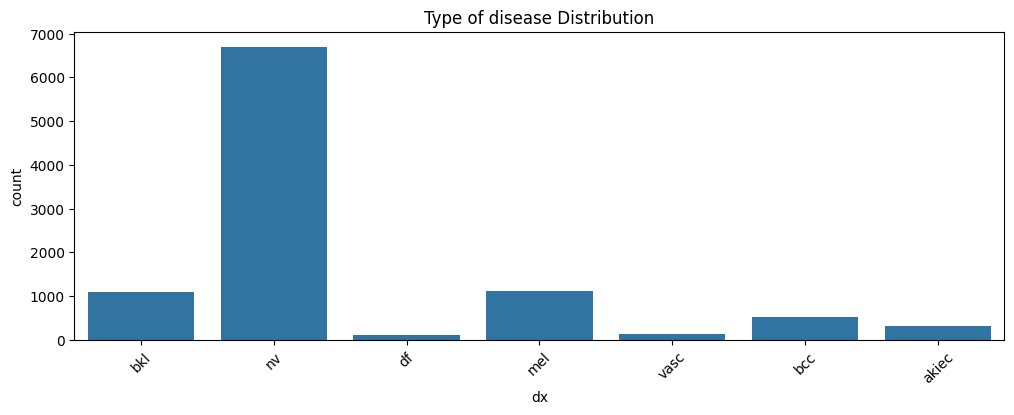

time: 886 ms (started: 2024-07-16 13:49:05 +00:00)


In [26]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Distribution of value count for Confirmation method of disease
for column in categorical_columns:
    meta_data['dx_type'].value_counts()

meta_data['dx_type'].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

time: 17 ms (started: 2024-07-16 13:49:12 +00:00)


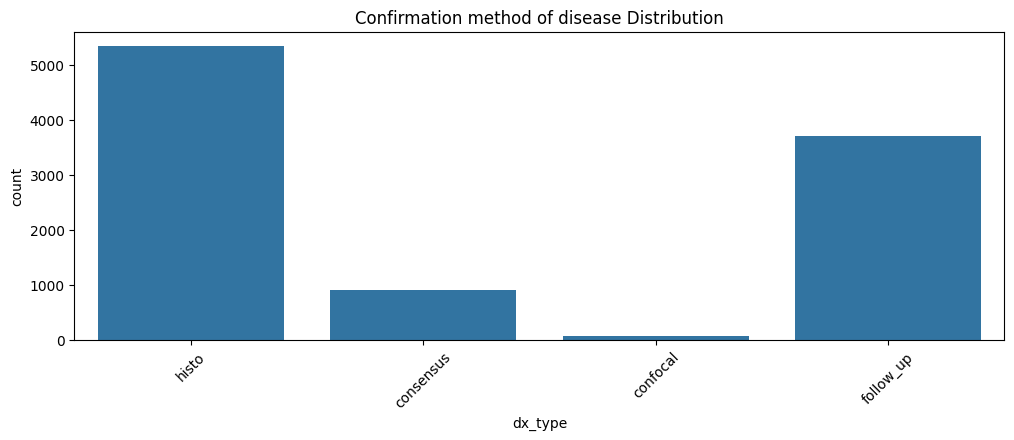

time: 403 ms (started: 2024-07-16 13:49:25 +00:00)


In [28]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type')
plt.title('Confirmation method of disease Distribution')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Distribution of numerical columns
for column in numerical_columns:
    print(f"\nValue counts for {column}:")
    print(meta_data[column].value_counts(dropna=False))  # Include NaN in counts


Value counts for age:
age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
NaN       57
10.0      41
0.0       39
Name: count, dtype: int64
time: 4.78 ms (started: 2024-07-16 13:49:34 +00:00)


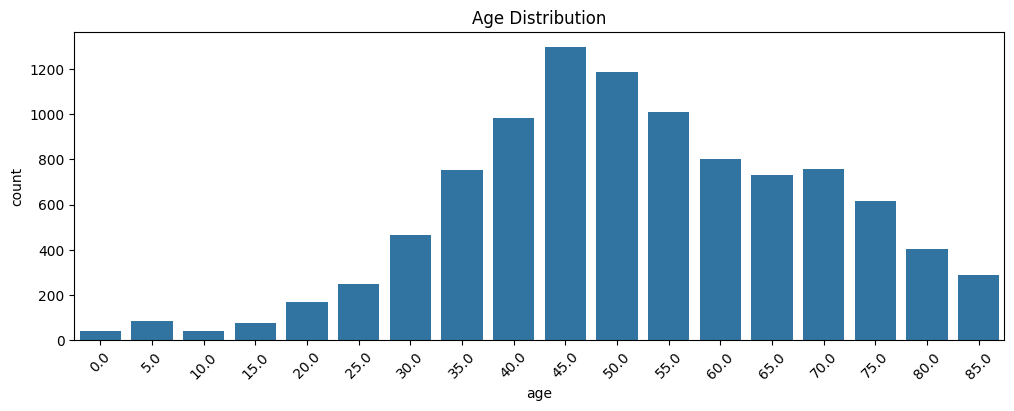

time: 543 ms (started: 2024-07-16 13:49:45 +00:00)


In [30]:
# Distribution of Age in pictorial format
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

###Data Analysis for Relationship among variables

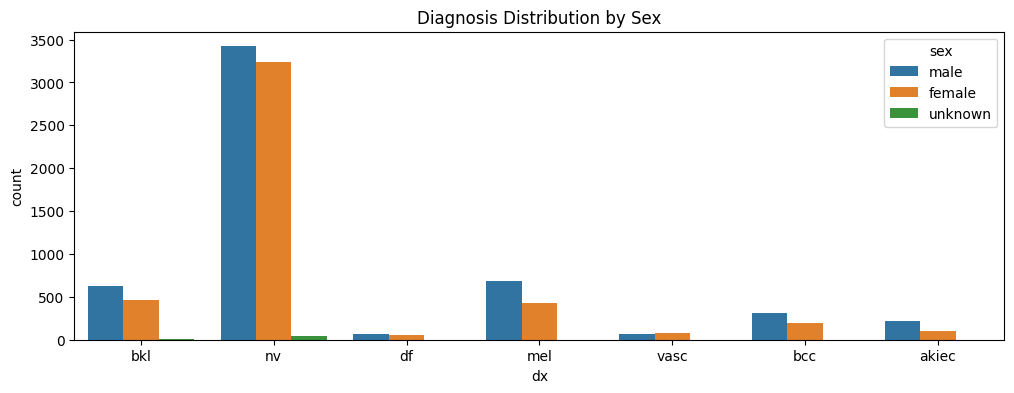

time: 1.48 s (started: 2024-07-16 15:05:13 +00:00)


In [31]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx', hue='sex')
plt.title('Diagnosis Distribution by Sex')
plt.show()

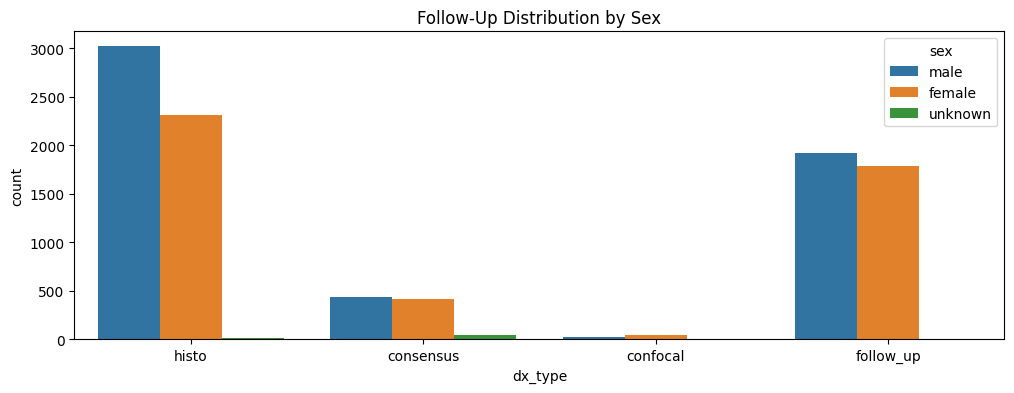

time: 915 ms (started: 2024-07-16 15:05:18 +00:00)


In [32]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type', hue='sex')
plt.title('Follow-Up Distribution by Sex')
plt.show()

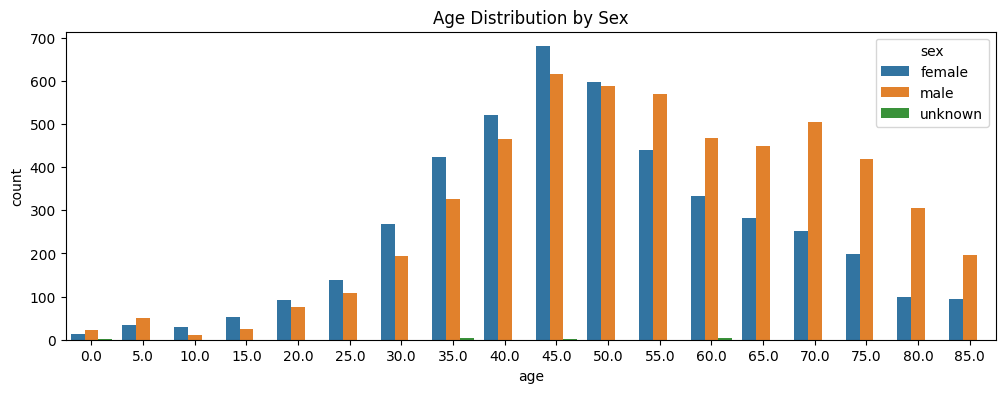

time: 1.27 s (started: 2024-07-16 15:05:26 +00:00)


In [33]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='sex')
plt.title('Age Distribution by Sex')
plt.show()

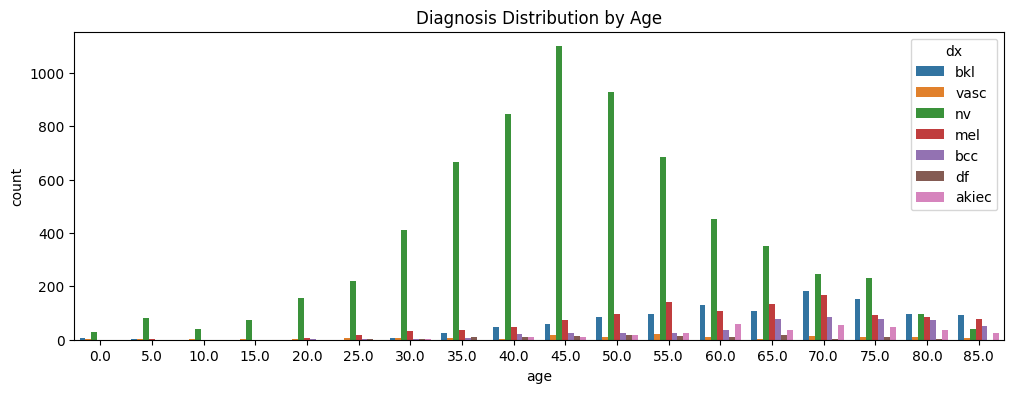

time: 1.12 s (started: 2024-07-16 15:05:44 +00:00)


In [34]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx')
plt.title('Diagnosis Distribution by Age')
plt.show()

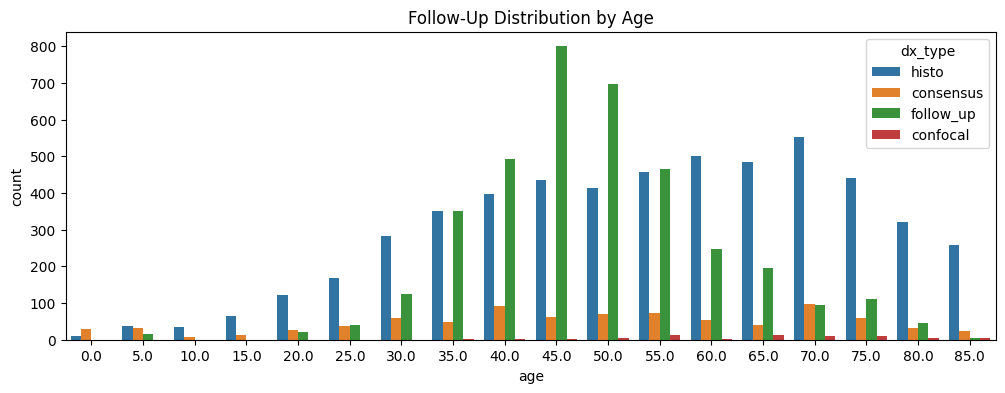

time: 2.58 s (started: 2024-07-16 15:05:55 +00:00)


In [35]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx_type')
plt.title('Follow-Up Distribution by Age')
plt.show()

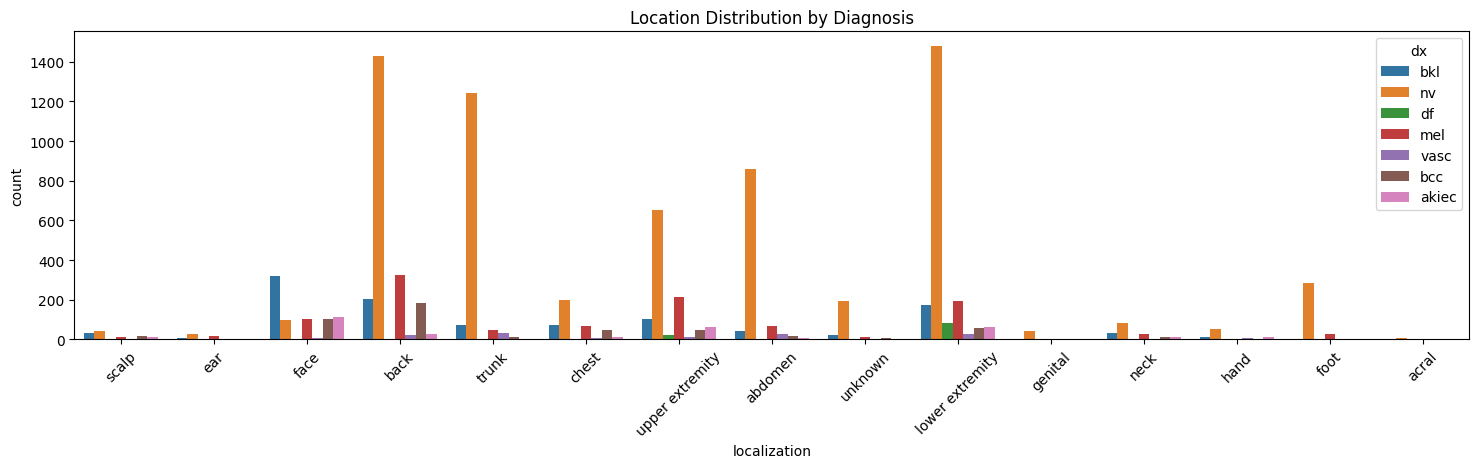

time: 913 ms (started: 2024-07-16 15:06:06 +00:00)


In [36]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx')
plt.title('Location Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

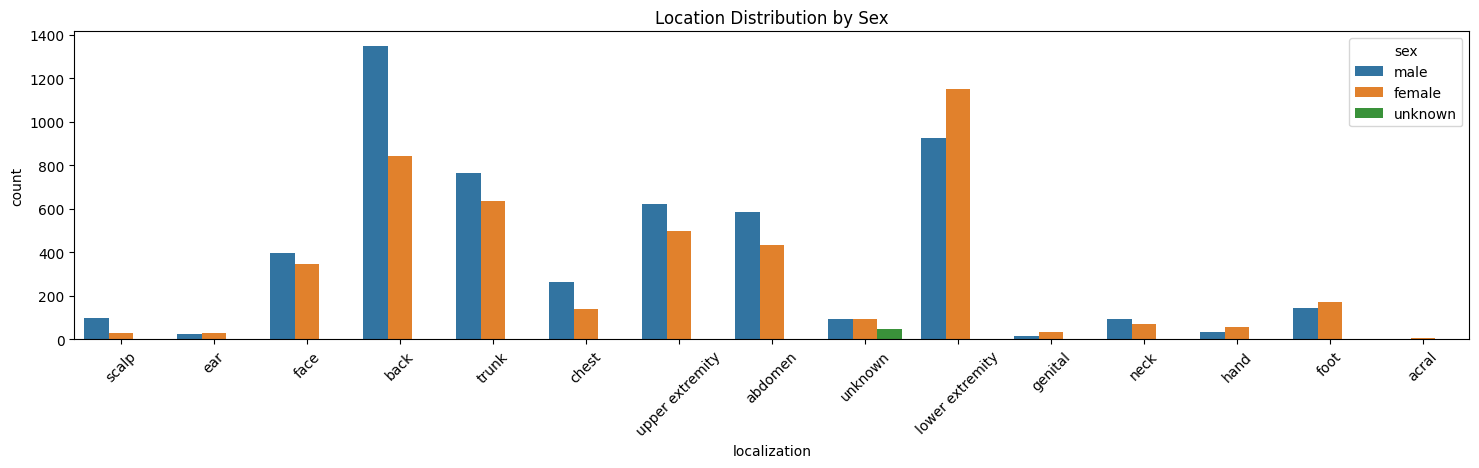

time: 2.14 s (started: 2024-07-16 15:06:15 +00:00)


In [37]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='sex')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

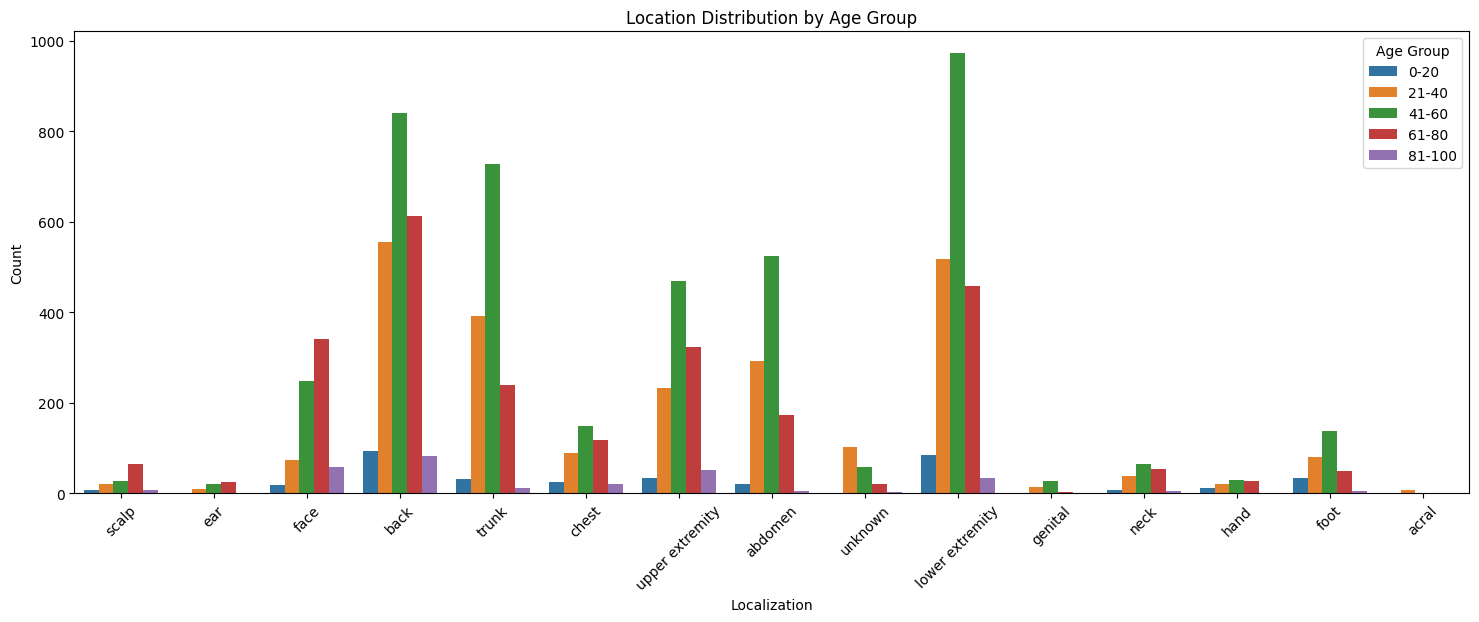

time: 1.37 s (started: 2024-07-16 15:06:26 +00:00)


In [38]:
# Assuming 'age' column contains numerical values, create age groups
age_groups = pd.cut(meta_data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Add the age groups as a new column in the DataFrame
meta_data['age_group'] = age_groups

# Visualizing relationships between categorical columns and age groups
plt.figure(figsize=(18, 6))
sns.countplot(data=meta_data, x='localization', hue='age_group')
plt.title('Location Distribution by Age Group')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

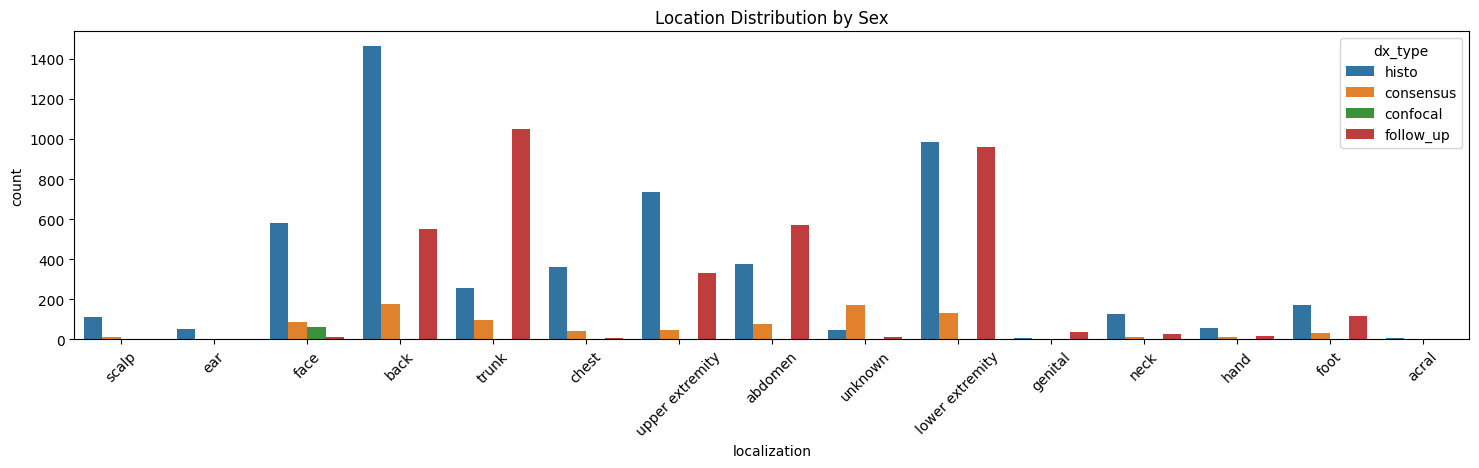

time: 2.68 s (started: 2024-07-16 15:06:38 +00:00)


In [39]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx_type')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

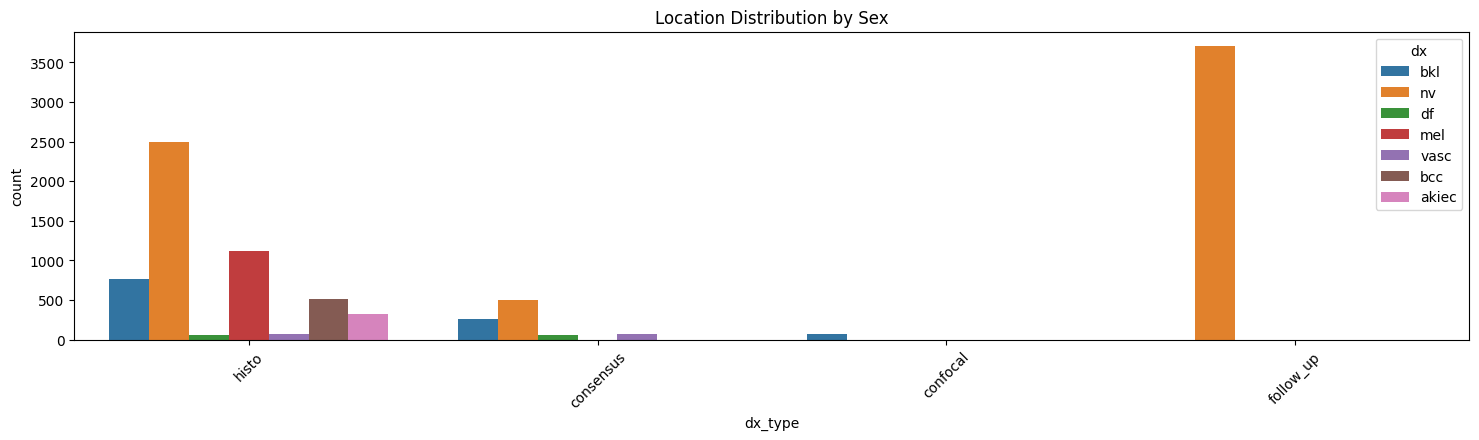

time: 1.41 s (started: 2024-07-16 15:06:47 +00:00)


In [40]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='dx_type', hue='dx')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

##DATA PREPROCESSING

Step 1: Data cleansing involves identifying and correcting errors or inconsistencies in the data.

In [41]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lesion_id     10015 non-null  object  
 1   image_id      10015 non-null  object  
 2   dx            10015 non-null  object  
 3   dx_type       10015 non-null  object  
 4   age           9958 non-null   float64 
 5   sex           10015 non-null  object  
 6   localization  10015 non-null  object  
 7   age_group     9919 non-null   category
dtypes: category(1), float64(1), object(6)
memory usage: 557.8+ KB
time: 71.7 ms (started: 2024-07-16 15:07:22 +00:00)


In [42]:
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,age_group
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,61-80
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,61-80
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,61-80
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,61-80
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,61-80


time: 98.9 ms (started: 2024-07-16 15:07:28 +00:00)


In [43]:
# Removing duplicate rows
meta_data = meta_data.drop_duplicates()
meta_data = meta_data.drop(columns=['age_group'])

time: 45.5 ms (started: 2024-07-16 15:07:49 +00:00)


In [44]:
#Handle Missing Entries using the median
# Replace missing values in 'age' column with median age
median_age = meta_data['age'].median()
meta_data['age'] = meta_data['age'].fillna(median_age)

time: 13.5 ms (started: 2024-07-16 15:08:04 +00:00)


In [45]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
time: 28 ms (started: 2024-07-16 15:08:11 +00:00)


Fixing column names

In [46]:
meta_data = meta_data.rename(columns={
    'lesion_id': 'Lesion_Id',
    'image_id': 'Image_Id',
    'dx': 'Diagnosis',
    'dx_type': 'Confirmation_Method',
    'age': 'Age',
    'sex': 'Sex',
    'localization': 'Region_Of_Disease'
})

time: 3.45 ms (started: 2024-07-16 15:08:34 +00:00)


In [47]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lesion_Id            10015 non-null  object 
 1   Image_Id             10015 non-null  object 
 2   Diagnosis            10015 non-null  object 
 3   Confirmation_Method  10015 non-null  object 
 4   Age                  10015 non-null  float64
 5   Sex                  10015 non-null  object 
 6   Region_Of_Disease    10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
time: 95.2 ms (started: 2024-07-16 15:08:42 +00:00)


In [48]:
# Define the mapping of current values to new values
diagnosis_mapping = {
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-Like Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi'
}

# Create a new column with the updated diagnosis names
meta_data['Updated_Diagnosis'] = meta_data['Diagnosis'].map(diagnosis_mapping)

time: 7.93 ms (started: 2024-07-16 15:09:01 +00:00)


In [49]:
meta_data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign Keratosis-Like Lesions


time: 254 ms (started: 2024-07-16 15:09:08 +00:00)


In [50]:
# Convert the Age column to integers

meta_data['Age'] = meta_data['Age'].astype(int)

time: 9.46 ms (started: 2024-07-16 15:09:34 +00:00)


In [51]:
meta_data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign Keratosis-Like Lesions


time: 93.2 ms (started: 2024-07-16 15:09:39 +00:00)


#MODEL IMPLEMENTATION

In [52]:
image_dir1 = '/content/HAM10000_images_part_1'
image_dir2 = '/content/HAM10000_images_part_2'

image_paths = [os.path.join(image_dir1, fname) for fname in os.listdir(image_dir1)]
image_paths += [os.path.join(image_dir2, fname) for fname in os.listdir(image_dir2)]

image_path_dict = {os.path.splitext(os.path.basename(p))[0]: p for p in image_paths}

meta_data['Image_path'] = meta_data['Image_Id'].map(image_path_dict)

label_to_id = {label: idx for idx, label in enumerate(meta_data['Diagnosis'].unique())}

time: 116 ms (started: 2024-07-16 15:15:13 +00:00)


In [53]:
meta_data

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis,Image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/HAM10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign Keratosis-Like Lesions,/content/HAM10000_images_part_2/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40,male,abdomen,Actinic Keratoses,/content/HAM10000_images_part_2/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40,male,abdomen,Actinic Keratoses,/content/HAM10000_images_part_2/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40,male,abdomen,Actinic Keratoses,/content/HAM10000_images_part_2/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80,male,face,Actinic Keratoses,/content/HAM10000_images_part_2/ISIC_0032854.jpg


time: 265 ms (started: 2024-07-16 15:15:19 +00:00)


##Models Initialization

###Load pre-trained models

In [ ]:
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(240, 426, 3))
resnet50v2 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(240, 426, 3))
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(240, 426, 3))
xception = Xception(weights='imagenet', include_top=False, input_shape=(240, 426, 3))

83683744/83683744 [==============================] - 0s 0us/step
time: 10.8 s (started: 2024-04-07 16:16:34 +00:00)


###Define a custom CNN autoencoder model

In [ ]:
def custom_cnn_model():
    # Define the Convolutional Autoencoder architecture

    input_img = Input(shape=(240, 426, 3))

    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), name='Encoding_Conv2D_1')(input_img)
    x = MaxPooling2D((2, 2), padding='same', name='Encoding_MaxPooling2D_1')(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), name='Encoding_Conv2D_2')(x)
    x = MaxPooling2D((2, 2), padding='same', name='Encoding_MaxPooling2D_2')(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), name='Encoding_Conv2D_3')(x)
    x = MaxPooling2D((2, 2), padding='same', name='Encoding_MaxPooling2D_3')(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), name='Encoding_Conv2D_4')(x)
    encoded = MaxPooling2D((2, 2), padding='valid', name='Encoding_MaxPooling2D_4')(x)

    # This is the encoded representation of the input
    autoencoder = Model(input_img, encoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

customCNN = custom_cnn_model()

time: 196 ms (started: 2024-04-07 16:26:21 +00:00)


In [ ]:
customCNN.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 240, 426, 3)]     0         
                                                                 
 Encoding_Conv2D_1 (Conv2D)  (None, 240, 426, 64)      1792      
                                                                 
 Encoding_MaxPooling2D_1 (M  (None, 120, 213, 64)      0         
 axPooling2D)                                                    
                                                                 
 Encoding_Conv2D_2 (Conv2D)  (None, 120, 213, 128)     73856     
                                                                 
 Encoding_MaxPooling2D_2 (M  (None, 60, 107, 128)      0         
 axPooling2D)                                                    
                                                                 
 Encoding_Conv2D_3 (Conv2D)  (None, 60, 107, 256)      2951

## Set models' name

In [ ]:
vgg19_name = 'vgg19'
resnet50v2_name = 'resnet50'
inceptionv3_name = 'inceptionv3'
xception_name = 'xception'
customCNN_name = 'customCNN'

time: 683 µs (started: 2024-04-07 16:16:45 +00:00)


##Model works

In [ ]:
def extract_features(input_array, model_name):
    if model_name == vgg19_name:
        return vgg19.predict(input_array)

    elif model_name == resnet50v2_name:
        return resnet50v2.predict(input_array)

    elif model_name == inceptionv3_name:
        return inceptionv3.predict(input_array)

    elif model_name == xception_name:
        return xception.predict(input_array)

    elif model_name == customCNN_name:
        return customCNN.predict(input_array)

    else: return

time: 626 µs (started: 2024-04-07 16:16:45 +00:00)


#DEFINE FUNCTIONS

## Preprocessing


##Visualization

##Input image

#TESING MODELS

##Feature extraction

In [ ]:
import pickle
def store_features(input_array):
    model_names = ['vgg19','resnet50','inceptionv3','xception','customCNN']
    features_dict = {}

    for model_name in model_names:
        features = get_features_flatten( model_name,input_array)
        if features is not None:
            with open(f"/content/drive/MyDrive/Pickle/{model_name}_all_features.pkl", 'wb') as f:
                pickle.dump(features, f)

store_features(images)

38/38 [==============================] - 11s 296ms/step
Time taken for feature extraction: 21.307188987731934 seconds
Using vgg19, we get (1209, 7, 13, 512)
38/38 [==============================] - 6s 154ms/step
Time taken for feature extraction: 11.092413902282715 seconds
Using resnet50, we get (1209, 8, 14, 2048)
38/38 [==============================] - 4s 112ms/step
Time taken for feature extraction: 6.2546234130859375 seconds
Using inceptionv3, we get (1209, 6, 11, 2048)
38/38 [==============================] - 9s 236ms/step
Time taken for feature extraction: 21.35185742378235 seconds
Using xception, we get (1209, 8, 14, 2048)
38/38 [==============================] - 6s 104ms/step
Time taken for feature extraction: 11.286916494369507 seconds
Using customCNN, we get (1209, 15, 27, 512)
time: 1min 41s (started: 2024-04-07 16:26:43 +00:00)


##Get test images

##Test the model